In [7]:
!pip install geopy 
#geopy makes it easy for Python developers to locate the coordinates of addresses, cities, countries, and landmarks
#across the globe using third-party geocoders and other data sources.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import sweetviz
df=pd.read_csv('IT_Salary_Survey_EU _2020.csv')


In [3]:
df.head()

Timestamp   Age Gender    City           Position   \
0  24/11/2020 11:14:15  26.0   Male  Munich   Software Engineer   
1  24/11/2020 11:14:16  26.0   Male  Berlin   Backend Developer   
2  24/11/2020 11:14:21  29.0   Male  Berlin   Software Engineer   
3  24/11/2020 11:15:24  28.0   Male  Berlin  Frontend Developer   
4  24/11/2020 11:15:46  37.0   Male  Berlin   Backend Developer   

  Total years of experience Years of experience in Germany Seniority level  \
0                         5                              3          Senior   
1                         7                              4          Senior   
2                        12                              6            Lead   
3                         4                              1          Junior   
4                        17                              6          Senior   

  Your main technology / programming language  \
0                                  TypeScript   
1                                        Ruby   
2                     Javascript / Typescript   
3                                  Javascript   
4                                     C# .NET   

  Other technologies/programming languages you use often  ...  \
0                    Kotlin, Javascript / Typescript      ...   
1                                                NaN      ...   
2                    Javascript / Typescript, Docker      ...   
3                                                NaN      ...   
4                             .NET, SQL, AWS, Docker      ...   

   Annual bonus+stocks one year ago. Only answer if staying in same country  \
0                                              10000                          
1                                               5000                          
2                                             100000                          
3                                                NaN                          
4                                                NaN                          

  Number of vacation days           Employment status   Сontract duration  \
0                      30          Full-time employee  Unlimited contract   
1                      28          Full-time employee  Unlimited contract   
2                      30  Self-employed (freelancer)  Temporary contract   
3                      24          Full-time employee  Unlimited contract   
4                      29          Full-time employee  Unlimited contract   

  Main language at work Company size Company type  \
0               English       51-100      Product   
1               English     101-1000      Product   
2               English     101-1000      Product   
3               English       51-100      Startup   
4               English     101-1000      Product   

  Have you lost your job due to the coronavirus outbreak?  \
0                                                 No        
1                                                 No        
2                                                Yes        
3                                                 No        
4                                                 No        

  Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week  \
0                                                NaN                                                  
1                                                NaN                                                  
2                                                NaN                                                  
3                                                NaN                                                  
4                                                NaN                                                  

  Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR  
0                                                NaN                                    

In [4]:
#renaming columns name
df.rename(columns={'Сontract duration':'Contract duration','Position ':'Position','Yearly brutto salary (without bonus and stocks) in EUR':'Yearly brutto salary in EUR','Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country':'Annual brutto salary one year ago','Annual bonus+stocks one year ago. Only answer if staying in same country':'Annual bonus+stocks one year ago','Your main technology / programming language':'Programming language','Other technologies/programming languages you use often':'Other programming languages','Have you lost your job due to the coronavirus outbreak?':'Lost job due to COVID','Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week':'Shorter working hours','Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR':'Work From Home allowance in 2020'},inplace=True)

# Retrieving Top 5 position of Germany data

In [8]:
from geopy.geocoders import Nominatim
from tqdm import tqdm_notebook as tqdm

def place2country(address):
    geolocator = Nominatim(user_agent='sample', timeout=200)
    loc = geolocator.geocode(address, language='en')
    coordinates = (loc.latitude, loc.longitude)
    location = geolocator.reverse(coordinates, language='en')
    country = location.raw['address']['country']
    return country

In [9]:
place_list = df['City'].unique()
country_dict = {}
for place in tqdm(place_list):
    try:
        country = place2country(place)
        country_dict[place] = country
    except:
        print(place)
        country_dict[place] = np.nan

  0%|          | 0/119 [00:00<?, ?it/s]

Prefer not to say
Dusseldurf


In [10]:
df['Country']=df['City'].map(country_dict)
df.head()

Timestamp   Age Gender    City            Position  \
0  24/11/2020 11:14:15  26.0   Male  Munich   Software Engineer   
1  24/11/2020 11:14:16  26.0   Male  Berlin   Backend Developer   
2  24/11/2020 11:14:21  29.0   Male  Berlin   Software Engineer   
3  24/11/2020 11:15:24  28.0   Male  Berlin  Frontend Developer   
4  24/11/2020 11:15:46  37.0   Male  Berlin   Backend Developer   

  Total years of experience Years of experience in Germany Seniority level  \
0                         5                              3          Senior   
1                         7                              4          Senior   
2                        12                              6            Lead   
3                         4                              1          Junior   
4                        17                              6          Senior   

      Programming language      Other programming languages  ...  \
0               TypeScript  Kotlin, Javascript / Typescript  ...   
1                     Ruby                              NaN  ...   
2  Javascript / Typescript  Javascript / Typescript, Docker  ...   
3               Javascript                              NaN  ...   
4                  C# .NET           .NET, SQL, AWS, Docker  ...   

   Number of vacation days           Employment status   Contract duration  \
0                       30          Full-time employee  Unlimited contract   
1                       28          Full-time employee  Unlimited contract   
2                       30  Self-employed (freelancer)  Temporary contract   
3                       24          Full-time employee  Unlimited contract   
4                       29          Full-time employee  Unlimited contract   

  Main language at work Company size Company type Lost job due to COVID  \
0               English       51-100      Product                    No   
1               English     101-1000      Product                    No   
2               English     101-1000      Product                   Yes   
3               English       51-100      Startup                    No   
4               English     101-1000      Product                    No   

  Shorter working hours Work From Home allowance in 2020  Country  
0                   NaN                              NaN  Germany  
1                   NaN                              NaN  Germany  
2                   NaN                              NaN  Germany  
3                   NaN                              NaN  Germany  
4                   NaN                              NaN  Germany  

[5 rows x 24 columns]

In [11]:
df_g=df.loc[df['Country']=='Germany']
df_g.head()

Timestamp   Age Gender    City            Position  \
0  24/11/2020 11:14:15  26.0   Male  Munich   Software Engineer   
1  24/11/2020 11:14:16  26.0   Male  Berlin   Backend Developer   
2  24/11/2020 11:14:21  29.0   Male  Berlin   Software Engineer   
3  24/11/2020 11:15:24  28.0   Male  Berlin  Frontend Developer   
4  24/11/2020 11:15:46  37.0   Male  Berlin   Backend Developer   

  Total years of experience Years of experience in Germany Seniority level  \
0                         5                              3          Senior   
1                         7                              4          Senior   
2                        12                              6            Lead   
3                         4                              1          Junior   
4                        17                              6          Senior   

      Programming language      Other programming languages  ...  \
0               TypeScript  Kotlin, Javascript / Typescript  ...   
1                     Ruby                              NaN  ...   
2  Javascript / Typescript  Javascript / Typescript, Docker  ...   
3               Javascript                              NaN  ...   
4                  C# .NET           .NET, SQL, AWS, Docker  ...   

   Number of vacation days           Employment status   Contract duration  \
0                       30          Full-time employee  Unlimited contract   
1                       28          Full-time employee  Unlimited contract   
2                       30  Self-employed (freelancer)  Temporary contract   
3                       24          Full-time employee  Unlimited contract   
4                       29          Full-time employee  Unlimited contract   

  Main language at work Company size Company type Lost job due to COVID  \
0               English       51-100      Product                    No   
1               English     101-1000      Product                    No   
2               English     101-1000      Product                   Yes   
3               English       51-100      Startup                    No   
4               English     101-1000      Product                    No   

  Shorter working hours Work From Home allowance in 2020  Country  
0                   NaN                              NaN  Germany  
1                   NaN                              NaN  Germany  
2                   NaN                              NaN  Germany  
3                   NaN                              NaN  Germany  
4                   NaN                              NaN  Germany  

[5 rows x 24 columns]

In [12]:
df_g['Position'].value_counts().sort_values(ascending=False)[:5]

Software Engineer     369
Backend Developer     157
Data Scientist         89
Frontend Developer     81
QA Engineer            68
Name: Position, dtype: int64

In [13]:
df_g_top5p=df_g.loc[(df_g['Position']=='Software Engineer')|(df_g['Position']=='Backend Developer')|(df_g['Position']=='Data Scientist')|(df_g['Position']=='Frontend Developer')|(df_g['Position']=='QA Engineer')]
df_g_top5p.head()

Timestamp   Age Gender    City            Position  \
0  24/11/2020 11:14:15  26.0   Male  Munich   Software Engineer   
1  24/11/2020 11:14:16  26.0   Male  Berlin   Backend Developer   
2  24/11/2020 11:14:21  29.0   Male  Berlin   Software Engineer   
3  24/11/2020 11:15:24  28.0   Male  Berlin  Frontend Developer   
4  24/11/2020 11:15:46  37.0   Male  Berlin   Backend Developer   

  Total years of experience Years of experience in Germany Seniority level  \
0                         5                              3          Senior   
1                         7                              4          Senior   
2                        12                              6            Lead   
3                         4                              1          Junior   
4                        17                              6          Senior   

      Programming language      Other programming languages  ...  \
0               TypeScript  Kotlin, Javascript / Typescript  ...   
1                     Ruby                              NaN  ...   
2  Javascript / Typescript  Javascript / Typescript, Docker  ...   
3               Javascript                              NaN  ...   
4                  C# .NET           .NET, SQL, AWS, Docker  ...   

   Number of vacation days           Employment status   Contract duration  \
0                       30          Full-time employee  Unlimited contract   
1                       28          Full-time employee  Unlimited contract   
2                       30  Self-employed (freelancer)  Temporary contract   
3                       24          Full-time employee  Unlimited contract   
4                       29          Full-time employee  Unlimited contract   

  Main language at work Company size Company type Lost job due to COVID  \
0               English       51-100      Product                    No   
1               English     101-1000      Product                    No   
2               English     101-1000      Product                   Yes   
3               English       51-100      Startup                    No   
4               English     101-1000      Product                    No   

  Shorter working hours Work From Home allowance in 2020  Country  
0                   NaN                              NaN  Germany  
1                   NaN                              NaN  Germany  
2                   NaN                              NaN  Germany  
3                   NaN                              NaN  Germany  
4                   NaN                              NaN  Germany  

[5 rows x 24 columns]

In [14]:
#renaming non numerical data
df_g_top5p.loc[(df_g_top5p['Yearly bonus + stocks in EUR']=='bvg only')|(df_g_top5p['Yearly bonus + stocks in EUR']=='Na')|(df_g_top5p['Yearly bonus + stocks in EUR']=='Not sure')|(df_g_top5p['Yearly bonus + stocks in EUR']=='-')|(df_g_top5p['Yearly bonus + stocks in EUR']=='depends')|(df_g_top5p['Yearly bonus + stocks in EUR']=='15000+-'),'Yearly bonus + stocks in EUR']=0

df_g_top5p.loc[(df_g_top5p['Annual bonus+stocks one year ago']=='learning budget, bvg, gym, food'),'Annual bonus+stocks one year ago']=0

df_g_top5p.loc[(df_g_top5p['Total years of experience']=='less than year'),'Total years of experience']=0
df_g_top5p.loc[(df_g_top5p['Total years of experience']=='6 (not as a data scientist, but as a lab scientist)'),'Total years of experience']=0
df_g_top5p.loc[(df_g_top5p['Total years of experience']=='1 (as QA Engineer) / 11 in total'),'Total years of experience']=1
df_g_top5p.loc[(df_g_top5p['Total years of experience']=='1,5'),'Total years of experience']=1.5

df_g_top5p.loc[(df_g_top5p['Years of experience in Germany']=='0,3'),'Years of experience in Germany']=0
df_g_top5p.loc[(df_g_top5p['Years of experience in Germany']=='< 1'),'Years of experience in Germany']=1
df_g_top5p.loc[(df_g_top5p['Years of experience in Germany']=='⁰'),'Years of experience in Germany']=0
df_g_top5p.loc[(df_g_top5p['Years of experience in Germany']=='6 (not as a data scientist, but as a lab scientist)'),'Years of experience in Germany']=0
df_g_top5p.loc[(df_g_top5p['Years of experience in Germany']=='less than year'),'Years of experience in Germany']=0
df_g_top5p.loc[(df_g_top5p['Years of experience in Germany']=='1,5'),'Years of experience in Germany']=1.5
df_g_top5p.loc[(df_g_top5p['Years of experience in Germany']=='0,5'),'Years of experience in Germany']=0.5
df_g_top5p.loc[(df_g_top5p['Years of experience in Germany']=='3,5'),'Years of experience in Germany']=3.5
df_g_top5p.loc[(df_g_top5p['Years of experience in Germany']=='0,3'),'Years of experience in Germany']=0.3
df_g_top5p.loc[(df_g_top5p['Years of experience in Germany']=='2,5'),'Years of experience in Germany']=2.5

df_g_top5p.loc[(df_g_top5p['Number of vacation days']=='nan'),'Number of vacation days']=0
df_g_top5p.loc[(df_g_top5p['Number of vacation days']=='unlimited '),'Number of vacation days']=0
df_g_top5p.loc[(df_g_top5p['Number of vacation days']=='unlimited'),'Number of vacation days']=0
df_g_top5p.loc[(df_g_top5p['Number of vacation days']=='Unlimited'),'Number of vacation days']=0
df_g_top5p.loc[(df_g_top5p['Number of vacation days']=='~25'),'Number of vacation days']=25

df_g_top5p.loc[(df_g_top5p['Work From Home allowance in 2020']==' 0'),'Work From Home allowance in 2020']=0
df_g_top5p.loc[(df_g_top5p['Work From Home allowance in 2020']=='No'),'Work From Home allowance in 2020']=0
df_g_top5p.loc[(df_g_top5p['Work From Home allowance in 2020']=='no'),'Work From Home allowance in 2020']=0
df_g_top5p.loc[(df_g_top5p['Work From Home allowance in 2020']=='75% from government '),'Work From Home allowance in 2020']=np.NaN
df_g_top5p.loc[(df_g_top5p['Work From Home allowance in 2020']=='40 every month'),'Work From Home allowance in 2020']=480
df_g_top5p.loc[(df_g_top5p['Work From Home allowance in 2020']=='200 Amazon voucher'),'Work From Home allowance in 2020']=200
df_g_top5p.loc[(df_g_top5p['Work From Home allowance in 2020']=='600 nett'),'Work From Home allowance in 2020']=600
df_g_top5p.loc[(df_g_top5p['Work From Home allowance in 2020']=='yes'),'Work From Home allowance in 2020']=np.NaN

df_g_top5p.loc[(df_g_top5p['Employment status']=="full-time, but 32 hours per week (it was my request, I'm a student)"),'Employment status']='Working Student'

df_g_top5p.loc[(df_g_top5p['Lost job due to COVID']=='Have been a freelancer at the beginning of year'),'Lost job due to COVID']='No'
df_g_top5p.loc[(df_g_top5p['Lost job due to COVID']=="i didn't but will be looking for new one because of covid"),'Lost job due to COVID']='No'
df_g_top5p.loc[(df_g_top5p['Lost job due to COVID']=='Lost job due to COVID'),'Lost job due to COVID']='Yes'

In [15]:
df_g_top5p['Total years of experience']=df_g_top5p['Total years of experience'].fillna(0)
df_g_top5p['Total years of experience']=df_g_top5p['Total years of experience'].apply(np.float64)
df_g_top5p['Years of experience in Germany']=df_g_top5p['Years of experience in Germany'].apply(np.float64)
df_g_top5p['Yearly bonus + stocks in EUR']=df_g_top5p['Yearly bonus + stocks in EUR'].apply(np.float64)
df_g_top5p['Annual bonus+stocks one year ago']=df_g_top5p['Annual bonus+stocks one year ago'].apply(np.float64)
df_g_top5p['Number of vacation days']=df_g_top5p['Number of vacation days'].apply(np.float64)
df_g_top5p['Shorter working hours']=df_g_top5p['Shorter working hours'].apply(np.float64)
df_g_top5p['Work From Home allowance in 2020']=df_g_top5p['Work From Home allowance in 2020'].apply(np.float64)

In [16]:
# Removing sharp jumps in data
df_g_top5p.loc[(df_g_top5p['Yearly brutto salary in EUR']>290000)]

Timestamp   Age Gender    City            Position  \
576  25/11/2020 13:26:21  24.0   Male  Munich      Data Scientist   
778  26/11/2020 17:08:47  42.0   Male  Berlin  Frontend Developer   

     Total years of experience  Years of experience in Germany  \
576                        1.0                             1.0   
778                       18.0                             5.0   

    Seniority level Programming language  \
576          Junior                  C++   
778          Senior             React JS   

                           Other programming languages  ...  \
576  Python, C/C++, Swift, Java / Scala, R, SQL, Go...  ...   
778                            Javascript / Typescript  ...   

     Number of vacation days   Employment status   Contract duration  \
576                      NaN  Full-time employee                 NaN   
778                     35.0  Full-time employee  Unlimited contract   

     Main language at work  Company size Company type Lost job due to COVID  \
576                English      101-1000      Startup                    No   
778                English      101-1000      Product                   Yes   

    Shorter working hours Work From Home allowance in 2020  Country  
576                  10.0                              NaN  Germany  
778                   NaN                           5000.0  Germany  

[2 rows x 24 columns]

In [17]:
df_g_top5p=df_g_top5p.drop(index=[576,778],axis=1)

# EDA of Top 5 position of Germany data

## Gender

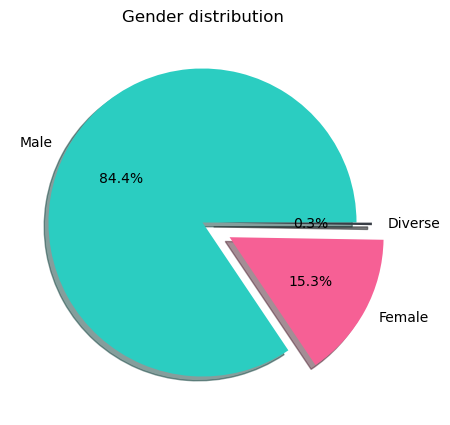

In [18]:
gender=df_g_top5p['Gender'].value_counts()
colors=['#2BCDC1','#F66095','#393E46','#CDC12B']
plt.figure(figsize=(5,5))
plt.pie(gender,labels=gender.index,autopct='%.1f%%',colors=colors,shadow=True,explode=[0,0.2,0.1])
plt.title('Gender distribution')
plt.show()

### Male accounts for 84.4% of this survey.

## Age

In [19]:
df_g_top5p['Gender']=pd.Categorical(df_g_top5p['Gender'],categories=['Male','Female','Diverse'])

fig=px.histogram(data_frame=df_g_top5p,x='Age',color='Gender',marginal='box',title='Age distribution',color_discrete_sequence=['#2BCDC1','#393E46','#F66095','#393E46'])
fig.show()

### People around 30 years old are the most common in this data.

## Position

In [20]:
df_g['Position'].value_counts()[:20]

Software Engineer      369
Backend Developer      157
Data Scientist          89
Frontend Developer      81
QA Engineer             68
DevOps                  54
Mobile Developer        44
Product Manager         38
ML Engineer             36
Data Engineer           24
Designer (UI/UX)        15
Engineering Manager     10
Data Analyst             7
SRE                      4
CTO                      4
Fullstack Developer      4
Consultant               3
Hardware Engineer        3
Team Lead                3
IT Manager               2
Name: Position, dtype: int64

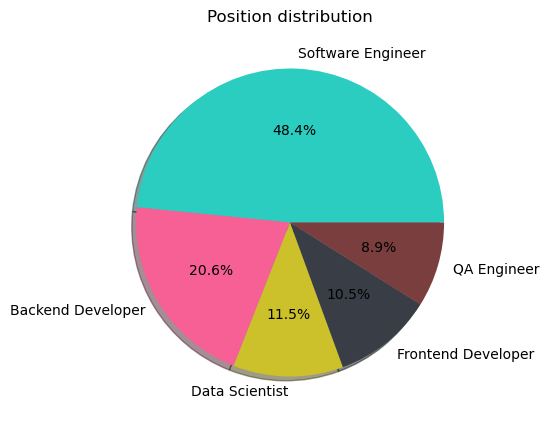

In [21]:
position=df_g_top5p['Position'].value_counts()
colors=['#2BCDC1','#F66095','#CDC12B','#393E46','#7A3E3E']
plt.figure(figsize=(5,5))
plt.pie(position,labels=position.index,autopct='%.1f%%',colors=colors,shadow=True)
plt.title('Position distribution')
plt.show()


In [22]:
city_p=df_g_top5p[['City','Position']].value_counts()
city_p.to_csv('city_p.csv')
city_p=pd.read_csv('city_p.csv')
city_p.rename(columns={'0':'count'},inplace=True)

px.bar(city_p,x='City',y='count',color='Position',title='Number of Position in each city of Germany',color_discrete_sequence=['#2BCDC1','#F66095','#CDC12B','#393E46','#7A3E3E'])

### Workers are clearly concentrated in Berlin.

## Salary

## Yearly brutto salary in EUR
#### Brutto(gross) salary is best defined as the sum of salary before the deduction of tax and insurance(s)

In [24]:
fig=px.histogram(data_frame=df_g_top5p,
         x='Yearly brutto salary in EUR',
         color='Position',
         title='Yearly brutto salary distribution',
         color_discrete_sequence=['#2BCDC1','#F66095','#393E46','#7A3E3E','#CDC12B'],
         facet_row='Position',
         facet_row_spacing=0.03)
fig.update_layout(width=1000,height=800)
fig.update_layout(font=dict(size=10))
fig.add_vline(x=df_g_top5p['Yearly brutto salary in EUR'].mean(),line_dash='dash',line_color='firebrick')
fig.show()
# Facet plots, also known as trellis plots or small multiples, are figures made up of multiple subplots 
# which have the same set of axes, where each subplot shows a subset of the data

## Annual brutto salary one year ago

In [25]:
fig=px.histogram(data_frame=df_g_top5p,
         x='Annual brutto salary one year ago',
         color='Position',
         title='Annual brutto salary distribution',
         color_discrete_sequence=['#2BCDC1','#F66095','#393E46','#7A3E3E','#CDC12B'],
         facet_row='Position',
         facet_row_spacing=0.03)
fig.update_layout(width=1000,height=800)
fig.update_layout(font=dict(size=10))
fig.add_vline(x=df_g_top5p['Annual brutto salary one year ago'].mean(),line_dash='dash',line_color='firebrick')
fig.show()

## Correlation between those salary 

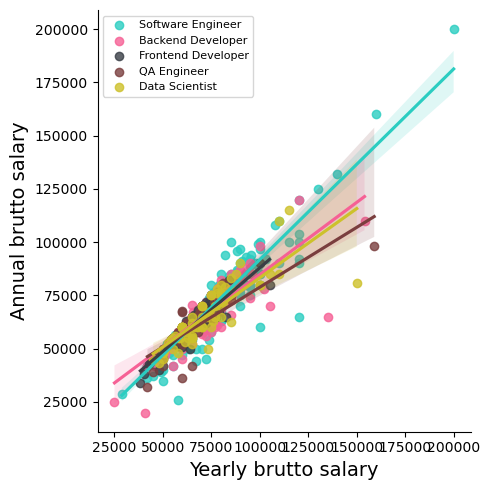

In [26]:
ax=sns.lmplot(x='Yearly brutto salary in EUR',y='Annual brutto salary one year ago',hue='Position',legend=False,data=df_g_top5p,palette=['#2BCDC1','#F66095','#393E46','#7A3E3E','#CDC12B'])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Yearly brutto salary',size=14)
plt.ylabel('Annual brutto salary',size=14)
plt.legend(fontsize=8)
plt.tight_layout()
plt.show()

### Software Engineer get higher salary than other positions on average.

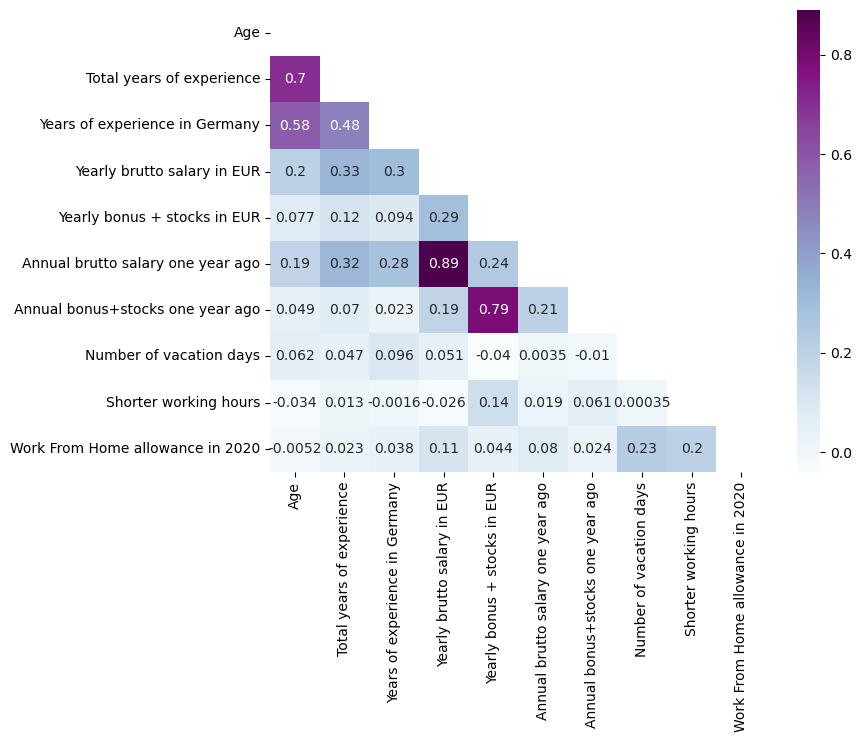

In [27]:
plt.figure(figsize=(8,6))
corr=df_g_top5p.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(corr,annot=True,mask=mask,cmap='BuPu')
plt.show()

### "Yearly brutto salary in EUR" and "Annual brutto salary one year ago" are highly correlated.

## Bonus + Stocks

In [29]:
fig=px.histogram(data_frame=df_g_top5p,
         x='Yearly bonus + stocks in EUR',
         color='Position',
         title='Yearly bonus + stocks in EUR distribution',
         color_discrete_sequence=['#2BCDC1','#F66095','#393E46','#7A3E3E','#CDC12B'],
         facet_row='Position',
         facet_row_spacing=0.03)
         
fig.update_layout(width=850,height=800)
fig.update_layout(font=dict(size=9))
fig.add_vline(x=df_g_top5p['Yearly bonus + stocks in EUR'].mean(),line_dash='dash',line_color='firebrick')
fig.show()

In [30]:
fig=px.histogram(data_frame=df_g_top5p,
         x='Annual bonus+stocks one year ago',
         color='Position',
         title='Annual bonus+stocks distribution',
         color_discrete_sequence=['#2BCDC1','#F66095','#393E46','#7A3E3E','#CDC12B'],
         facet_row='Position',
         facet_row_spacing=0.03)
         
fig.update_layout(width=850,height=800)
fig.update_layout(font=dict(size=9))
fig.add_vline(x=df_g_top5p['Annual bonus+stocks one year ago'].mean(),line_dash='dash',line_color='firebrick')
fig.show()

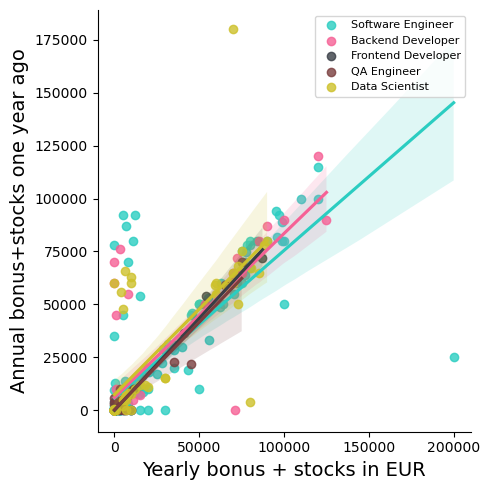

In [31]:
ax=sns.lmplot(x='Yearly bonus + stocks in EUR',y='Annual bonus+stocks one year ago',hue='Position',legend=False,data=df_g_top5p,palette=['#2BCDC1','#F66095','#393E46','#7A3E3E','#CDC12B'])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Yearly bonus + stocks in EUR',size=14)
plt.ylabel('Annual bonus+stocks one year ago',size=14)
plt.legend(fontsize=8)
plt.tight_layout()
plt.show()

### Both data of "Bonus + Stocks" has a similar tendency to Salary.

## Total years of experience 

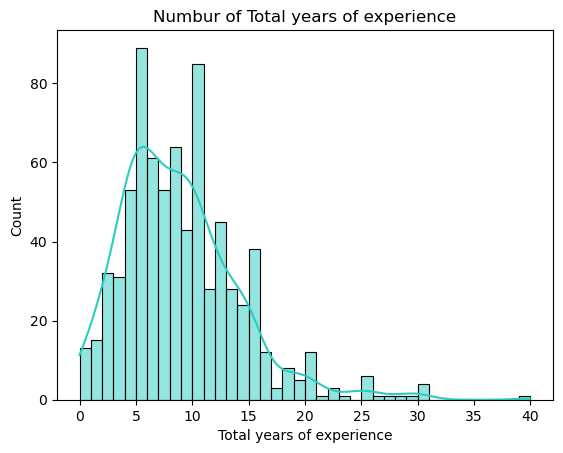

In [32]:
sns.histplot(data=df_g_top5p,x='Total years of experience',kde=True,color='#2BCDC1',bins=40)
plt.title('Numbur of Total years of experience')
plt.show()

### People have 5 years of working experience in total on average.

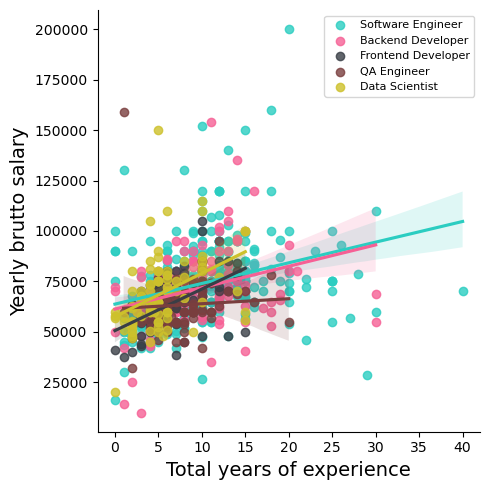

In [33]:
ax=sns.lmplot(y='Yearly brutto salary in EUR',x='Total years of experience',hue='Position',legend=False,data=df_g_top5p,palette=['#2BCDC1','#F66095','#393E46','#7A3E3E','#CDC12B'])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Yearly brutto salary',size=14)
plt.xlabel('Total years of experience',size=14)
plt.legend(fontsize=8)
plt.tight_layout()
plt.show()

### According to the heatmap above, the correlation between salary and experience is 33%. From this plot, you can see a bit of the tendency for a salary increase as long as you have more experience.

## Years of experience in Germany 

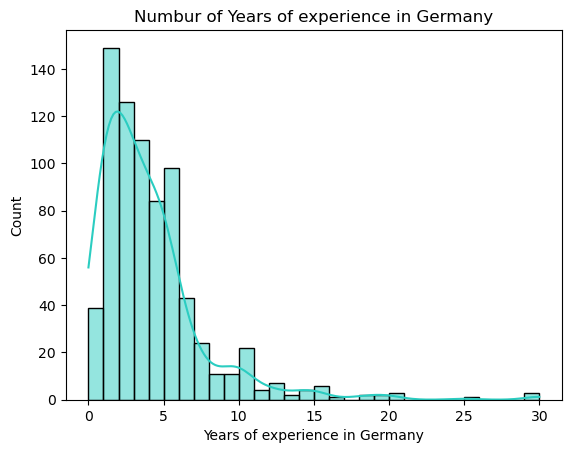

In [34]:
sns.histplot(data=df_g_top5p,x='Years of experience in Germany',kde=True,color='#2BCDC1',bins=30)
plt.title('Numbur of Years of experience in Germany')
plt.show()

### People in this data have 1 year of working experience in Germany on average.

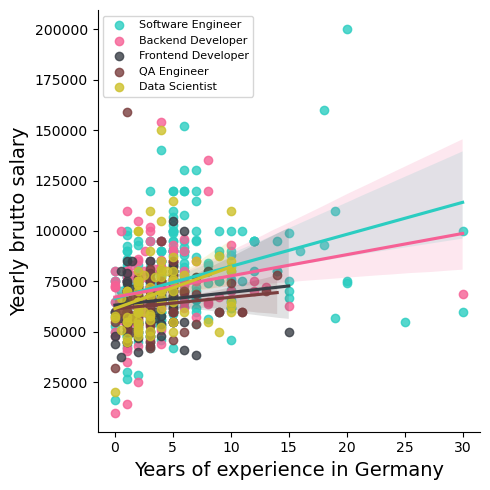

In [36]:
ax=sns.lmplot(y='Yearly brutto salary in EUR',x='Years of experience in Germany',hue='Position',legend=False,data=df_g_top5p,palette=['#2BCDC1','#F66095','#393E46','#7A3E3E','#CDC12B'])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Yearly brutto salary',size=14)
plt.xlabel('Years of experience in Germany',size=14)
plt.legend(fontsize=8)
plt.tight_layout()
plt.show()

### It has a similer tendency to the data above.

## Seniority level 

In [38]:
slevel=df_g_top5p['Seniority level'].value_counts()
slevel.to_csv('slevel.csv')
slevel=pd.read_csv('slevel.csv')
slevel.rename(columns={'Unnamed: 0':'Seniority level','Seniority level':'count'},inplace=True)
slevel.head()

slevel=pd.melt(slevel,id_vars=['Seniority level'],value_vars='count',value_name='Value')
slevel['percent']=[round(i*100/sum(slevel.Value),1) for i in slevel.Value]
slevel.head()

Seniority level variable  Value  percent
0          Senior    count    388     51.1
1          Middle    count    219     28.9
2            Lead    count     91     12.0
3          Junior    count     39      5.1
4            Head    count     15      2.0

In [39]:
slevel['Y']=[1]*len(slevel)
list_x=list(range(0,len(slevel)))
slevel['X']=list_x
slevel.head()

Seniority level variable  Value  percent  Y  X
0          Senior    count    388     51.1  1  0
1          Middle    count    219     28.9  1  1
2            Lead    count     91     12.0  1  2
3          Junior    count     39      5.1  1  3
4            Head    count     15      2.0  1  4

In [40]:
palette=list(sns.color_palette(palette='plasma_r',n_colors=len(slevel['Seniority level'])).as_hex())

label=[i+'<br>'+str(j)+'<br>'+str(k)+'%' for i,j,k in zip(slevel['Seniority level'],slevel.Value,slevel.percent)]

fig=px.scatter(slevel,x='X',y='Y',color='Seniority level',color_discrete_sequence=palette,size='Value',text=label,size_max=90)
fig.update_layout(width=900,height=320,margin=dict(t=50,l=0,r=0,b=0),showlegend=False)
fig.update_traces(textposition='top center')
fig.update_xaxes(showgrid=False,zeroline=False,visible=False)
fig.update_yaxes(showgrid=False,zeroline=False,visible=False)
fig.update_layout({'plot_bgcolor':'white','paper_bgcolor':'white'})
fig.show()

### In terms of Seniority level, Senior accounts for 51.1%, Middle 28.9%, and Lead 12.0% of this data.

In [41]:
df_g_top5p['Seniority level'].value_counts()

Senior                                       388
Middle                                       219
Lead                                          91
Junior                                        39
Head                                          15
Principal                                      2
intern                                         1
no idea, there are no ranges in the firm       1
Working Student                                1
student                                        1
Self employed                                  1
Name: Seniority level, dtype: int64

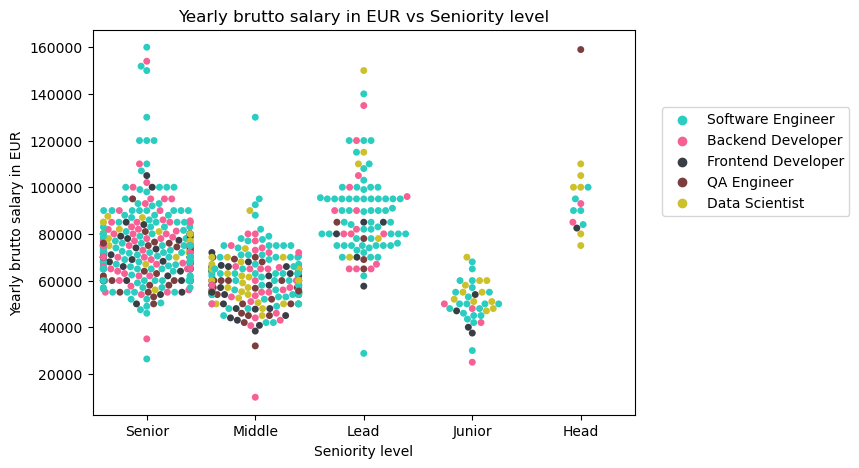

In [42]:
level=df_g_top5p.loc[(df_g_top5p['Seniority level']=='Senior')|(df_g_top5p['Seniority level']=='Middle')|(df_g_top5p['Seniority level']=='Lead')|(df_g_top5p['Seniority level']=='Junior')|(df_g_top5p['Seniority level']=='Head')]

plt.figure(figsize=(7,5))
sns.swarmplot(y='Yearly brutto salary in EUR',x='Seniority level',hue='Position',data=level,size=3,palette=['#2BCDC1','#F66095','#393E46','#7A3E3E','#CDC12B'],s=5,order=['Senior','Middle','Lead','Junior','Head'])
plt.legend(bbox_to_anchor=(1.05,0.8),loc='upper left',borderaxespad=0)
plt.title('Yearly brutto salary in EUR vs Seniority level')
plt.show()

### Lead and Head have a tendency of higher salaries compared to others.

##  Programming language 

In [43]:
df_g_top5p['Programming language']=df_g_top5p['Programming language'].str.capitalize()
df_g_top5p.loc[(df_g_top5p['Programming language']=='С#'),'Programming language']='C#'
df_g_top5p['Programming language']=df_g_top5p['Programming language'].str.rstrip()
df_g_top5p['Programming language'].unique()

array(['Typescript', 'Ruby', 'Javascript / typescript', 'Javascript',
       'C# .net', 'Php', 'Java', 'C++', 'Kotlin', 'Go', nan, 'Python',
       'React', 'C#', 'Ruby on rails', 'Javascript/es6', '.net', 'Js',
       'Scala', 'C#, .net core', 'Android', 'Swift', 'Scala, react.js',
       'Ml/python', 'Javascript/typescript', 'Frontend',
       'Java, javascript', '-', 'Typescript, javascript',
       'Pegasystems platform', 'C++, java, embedded c',
       'Java, angular, aws', 'Node.js', 'Ios', 'R', 'Bash', 'Nothing',
       'Angular', 'Js, typescript, angular', 'Pascal, vb.net, c#',
       'Angular, react', 'Elixir', 'Nodejs, typescript, aws', 'Erlang',
       'Qa', 'C++/c#', 'Typescript / angular', 'Abap', 'Golang',
       'Salesforce', 'Java/c++', 'Scala / python', 'Java/scala',
       'Go, php, sql', 'Qml', 'C', 'C#/.net', 'Several', 'Java/groovy',
       'Typescript, web apps', 'Python, statistics, sql',
       'Sql, bq, tableau, gtm, ga', 'Java, kotlin', 'Nodejs', 'Ts', 'Sql',


In [44]:
df_g_top5p['Programming language'].value_counts()[:20]

Java                       160
Python                     119
Javascript                  71
Php                         55
C++                         31
C#                          21
Typescript                  21
Scala                       20
Go                          18
Ruby                        18
.net                        17
Kotlin                      15
Js                          12
Javascript / typescript      9
C                            6
R                            6
Swift                        5
React                        4
Ruby on rails                4
Ios                          4
Name: Programming language, dtype: int64

In [45]:
planguage=df_g_top5p['Programming language'].value_counts()[:10]
planguage.to_csv('planguage.csv')
planguage=pd.read_csv('planguage.csv')
planguage.rename(columns={'Unnamed: 0':'Programming language','Programming language':'count'},inplace=True)
planguage.head()

planguage=pd.melt(planguage,id_vars=['Programming language'],value_vars='count',value_name='Value')
planguage['percent']=[round(i*100/sum(planguage.Value),1) for i in planguage.Value]
planguage.head()

Programming language variable  Value  percent
0                 Java    count    160     30.0
1               Python    count    119     22.3
2           Javascript    count     71     13.3
3                  Php    count     55     10.3
4                  C++    count     31      5.8

In [46]:
planguage['Y']=[1]*len(planguage)
list_x=list(range(0,len(planguage)))
planguage['X']=list_x
planguage.head()

Programming language variable  Value  percent  Y  X
0                 Java    count    160     30.0  1  0
1               Python    count    119     22.3  1  1
2           Javascript    count     71     13.3  1  2
3                  Php    count     55     10.3  1  3
4                  C++    count     31      5.8  1  4

In [47]:
!pip install circlify

In [48]:
import circlify

circles=circlify.circlify(planguage['Value'].tolist(),show_enclosure=False,target_enclosure=circlify.Circle(x=0,y=0))
circles.reverse()

## Top 10 Programming language

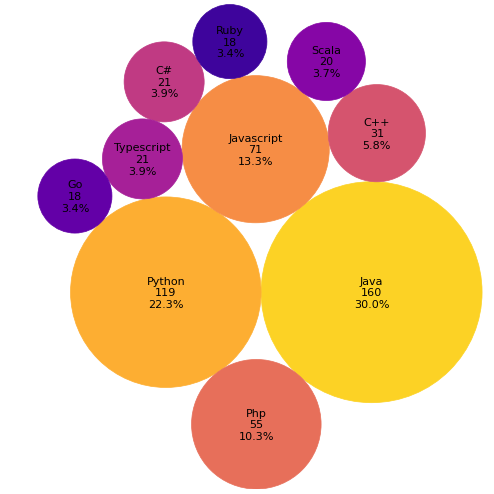

In [49]:
palette=list(sns.color_palette(palette='plasma_r',n_colors=len(planguage['Programming language'])).as_hex())

label=[i+'<br>'+str(j)+'<br>'+str(k)+'%' for i,j,k in zip(planguage['Programming language'],planguage.Value,planguage.percent)]
fig,ax=plt.subplots(figsize=(10,10),facecolor='white',dpi=50)
ax.axis('off')
lim=max(max(abs(circle.x)+circle.r,abs(circle.y)+circle.r,) for circle in circles)
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)

for circle,note,color in zip(circles,label,palette):
    x,y,r=circle
    ax.add_patch(plt.Circle((x,y),r,alpha=1,color=color))
    plt.annotate(note.replace('<br>','\n'),(x,y),size=16,va='center',ha='center')
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()

### The most used programming language is Java, secondary Python.

## Salary of Top 5 Programming language

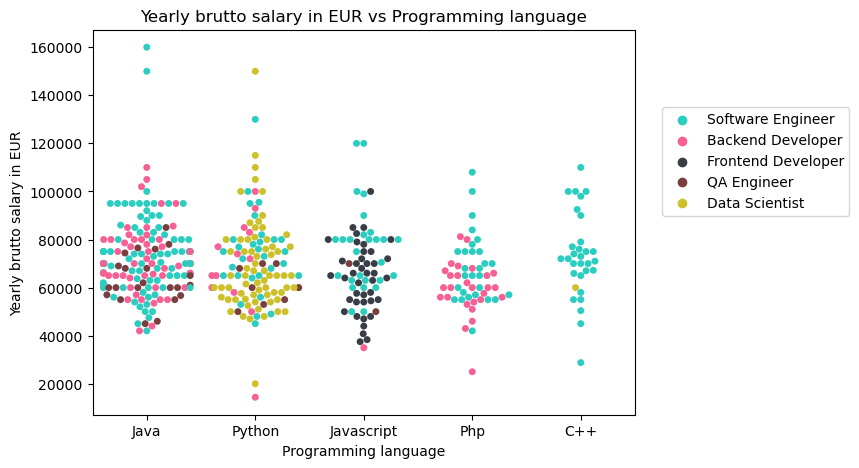

In [50]:
top5_lan=df_g_top5p.loc[(df_g_top5p['Programming language']=='Java')|(df_g_top5p['Programming language']=='Python')|(df_g_top5p['Programming language']=='Javascript')|(df_g_top5p['Programming language']=='Php')|(df_g_top5p['Programming language']=='C++')]
top5_lan['Position']=pd.Categorical(top5_lan['Position'],categories=['Software Engineer','Backend Developer','Frontend Developer','QA Engineer','Data Scientist'])

plt.figure(figsize=(7,5))
sns.swarmplot(y='Yearly brutto salary in EUR',x='Programming language',hue='Position',data=top5_lan,size=3,palette=['#2BCDC1','#F66095','#393E46','#7A3E3E','#CDC12B'],s=5,order=['Java','Python','Javascript','Php','C++'])
plt.legend(bbox_to_anchor=(1.05,0.8),loc='upper left',borderaxespad=0)
plt.title('Yearly brutto salary in EUR vs Programming language')
plt.show()

### Python is mainly used for Data Scientist, Javascript is for Fronted Developer. There is no big difference in salary between each programming language.

In [52]:
import os
from wordcloud import WordCloud
# Word Cloud is a data visualization technique used for representing text data in which 
# the size of each word indicates its frequency or importance.

## Other programming languages for Java users

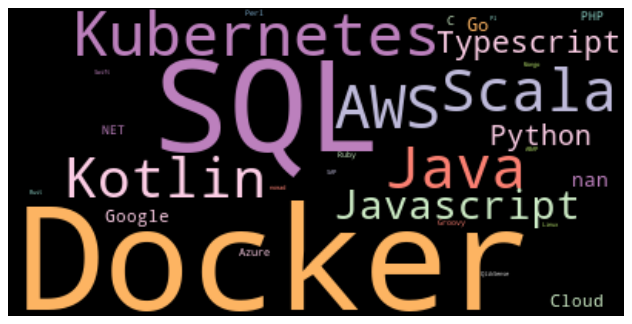

In [53]:
top1_other_lan=df_g_top5p.loc[(df_g_top5p['Programming language']=='Java')].astype(str)

text=' '.join(subject_titles for subject_titles in top1_other_lan['Other programming languages'])
word_cloud=WordCloud(collocations=False,background_color='black',colormap='Set3',min_font_size=2).generate(text)
plt.figure(figsize=(10,5),dpi=80)
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

### Java users also use Docker and SQL

## Other programming languages for Python users

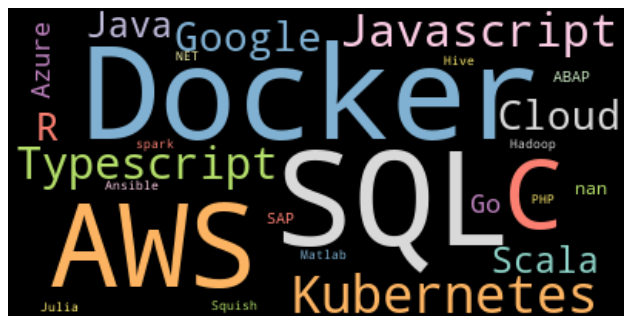

In [54]:
top2_other_lan=df_g_top5p.loc[(df_g_top5p['Programming language']=='Python')].astype(str)

stop_words=['Python']

text=' '.join(subject_titles for subject_titles in top2_other_lan['Other programming languages'])
word_cloud=WordCloud(stopwords=stop_words,collocations=False,background_color='black',colormap='Set3',min_font_size=2).generate(text)
plt.figure(figsize=(10,5),dpi=80)
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

### Python users use SQL, Docker and AWS mainly out of the main language

## Number of vacation days 

In [55]:
fig=px.histogram(data_frame=df_g_top5p,x='Number of vacation days',color='Position',marginal='box',title='Number of vacation days in Germany',color_discrete_sequence=['#2BCDC1','#F66095','#393E46','#7A3E3E','#CDC12B'])
fig.show()

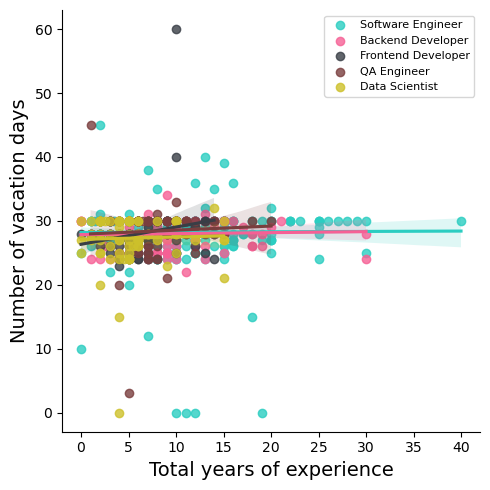

In [56]:
ax=sns.lmplot(x='Total years of experience',y='Number of vacation days',hue='Position',legend=False,data=df_g_top5p,palette=['#2BCDC1','#F66095','#393E46','#7A3E3E','#CDC12B'])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Number of vacation days',size=14)
plt.xlabel('Total years of experience',size=14)
plt.legend(fontsize=8)
plt.tight_layout()
plt.show()

### Regardless of Total years of experience, workers get 24-30 days of vacation on average.

## Employment status 

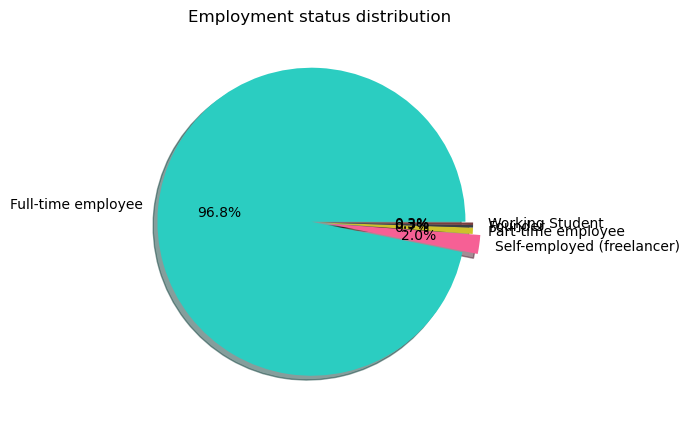

In [57]:
status=df_g_top5p['Employment status'].value_counts()[:5]

plt.figure(figsize=(5,5))
plt.pie(status,labels=status.index,autopct='%.1f%%',colors=colors,shadow=True,explode=[0.05,0.05,0,0,0])
plt.title('Employment status distribution')
plt.show()

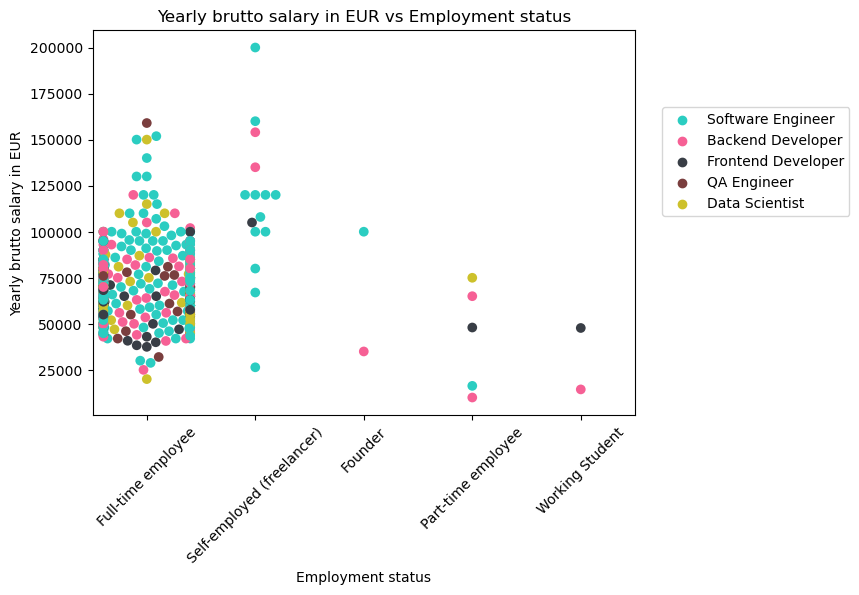

In [58]:
status=df_g_top5p.loc[(df_g_top5p['Employment status']=='Full-time employee')|(df_g_top5p['Employment status']=='Self-employed (freelancer)')|(df_g_top5p['Employment status']=='Part-time employee')|(df_g_top5p['Employment status']=='Founder')|(df_g_top5p['Employment status']=='Working Student')]

plt.figure(figsize=(7,5))
sns.swarmplot(y='Yearly brutto salary in EUR',x='Employment status',hue='Position',data=status,size=3,palette=['#2BCDC1','#F66095','#393E46','#7A3E3E','#CDC12B'],s=7)
plt.title('Yearly brutto salary in EUR vs Employment status')
plt.xticks(rotation=45,fontsize=10)
plt.legend(bbox_to_anchor=(1.05,0.8),loc='upper left',borderaxespad=0)
plt.show()

### Full-time enployees and Self-employed(freelancer) look getting salary widely, but Self-employed can get more than others.

## Contract duration

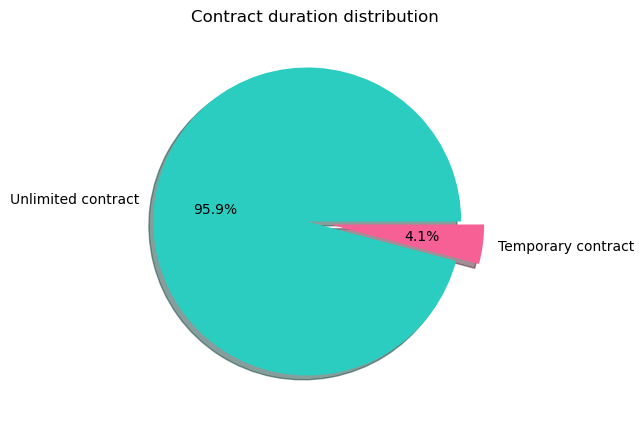

In [59]:
dur=df_g_top5p['Contract duration'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(dur,labels=dur.index,autopct='%.1f%%',colors=colors,shadow=True,explode=[0.05,0.1])
plt.title('Contract duration distribution')
plt.show()

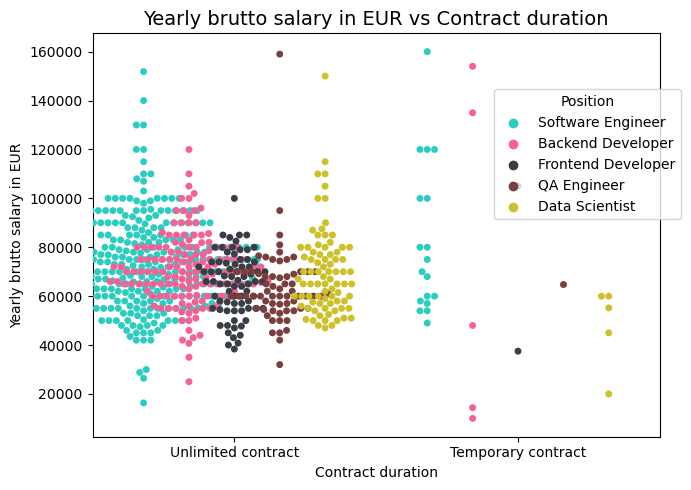

In [60]:
contract=df_g_top5p.loc[(df_g_top5p['Contract duration']=='Unlimited contract')|(df_g_top5p['Contract duration']=='Temporary contract')]

plt.figure(figsize=(7,5))
ax=sns.swarmplot(y='Yearly brutto salary in EUR',x='Contract duration',data=contract,hue='Position',dodge=True,size=5,palette=['#2BCDC1','#F66095','#393E46','#7A3E3E','#CDC12B'])
sns.move_legend(ax,loc='center right',bbox_to_anchor=(1.05,0.7),title='Position')
plt.title('Yearly brutto salary in EUR vs Contract duration',fontsize=14)
plt.tight_layout()
plt.show()

### It seems Software Engineer and Backend Developer can get higher salaries than those average.

## Main language at work

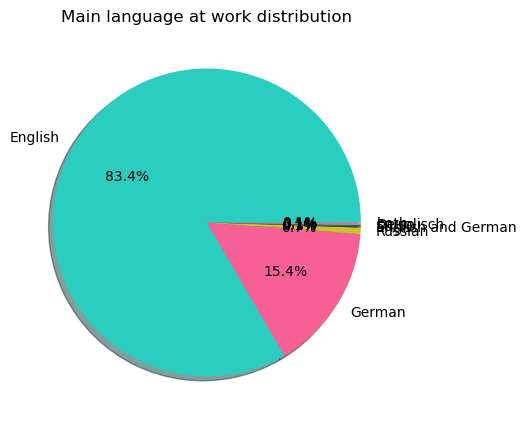

In [61]:
lan=df_g_top5p['Main language at work'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(lan,labels=lan.index,autopct='%.1f%%',colors=colors,shadow=True)
plt.title('Main language at work distribution')
plt.show()

### English is the most spoken language (accounting for 83.4%) for IT workers in Germany.

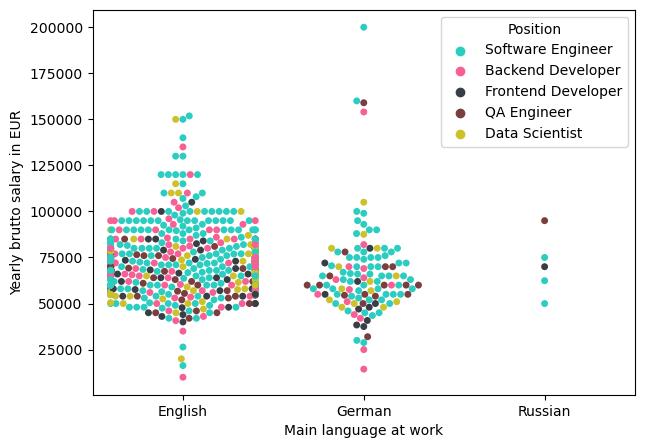

In [62]:
language=df_g_top5p.loc[(df_g_top5p['Main language at work']=='English')|(df_g_top5p['Main language at work']=='German')|(df_g_top5p['Main language at work']=='Russian')]

plt.figure(figsize=(7,5))
sns.swarmplot(language,y='Yearly brutto salary in EUR',x='Main language at work',hue='Position',palette=['#2BCDC1','#F66095','#393E46','#7A3E3E','#CDC12B'])
plt.show()

### It seems English speakers can receive higher salaries compared to other languages.

## Company size

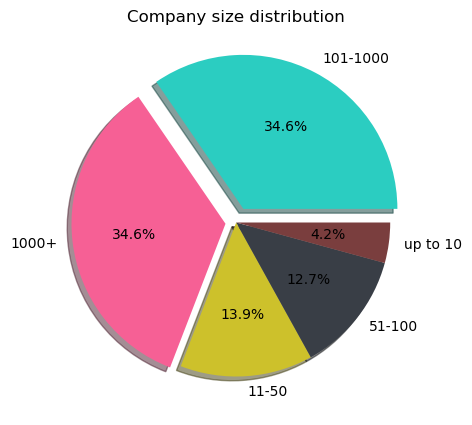

In [63]:
csize=df_g_top5p['Company size'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(csize,labels=csize.index,autopct='%.1f%%',colors=colors,shadow=True,explode=[0.1,0.07,0,0,0])
plt.title('Company size distribution')
plt.show()

### 101-1000 and 1000+ of the size of companies account for 34.6% each.

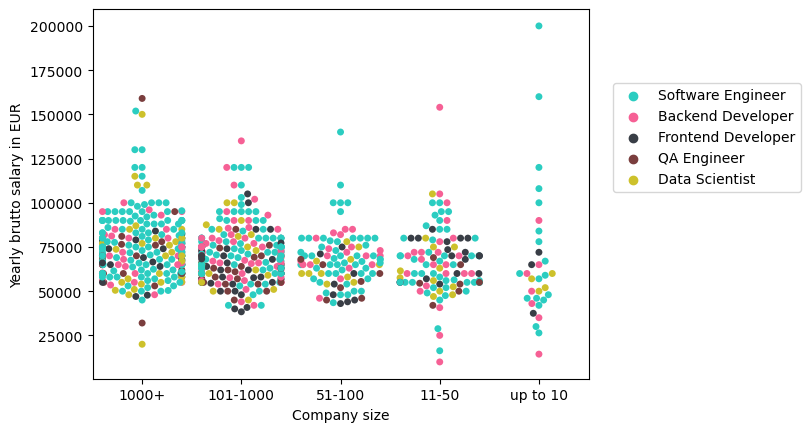

In [64]:
csize2=df_g_top5p.loc[(df_g_top5p['Company size']=='101-1000')|(df_g_top5p['Company size']=='1000+')|(df_g_top5p['Company size']=='11-50')|(df_g_top5p['Company size']=='51-100')|(df_g_top5p['Company size']=='up to 10')]

sns.swarmplot(csize2,y='Yearly brutto salary in EUR',x='Company size',hue='Position',palette=['#2BCDC1','#F66095','#393E46','#7A3E3E','#CDC12B'],order=['1000+','101-1000','51-100','11-50','up to 10'],)
plt.legend(bbox_to_anchor=(1.05,0.8),loc='upper left',borderaxespad=0)
plt.show()

### Working for a bigger company can get a higher salary on average.

## Company type 

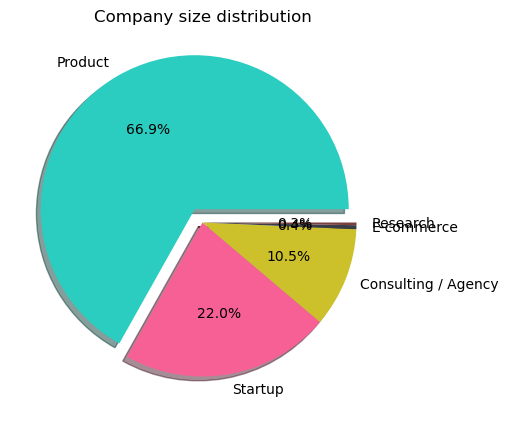

In [65]:
ctype=df_g_top5p['Company type'].value_counts()[:5]

plt.figure(figsize=(5,5))
plt.pie(ctype,labels=ctype.index,autopct='%.1f%%',colors=colors,shadow=True,explode=[0.1,0,0,0,0])
plt.title('Company size distribution')
plt.show()

### Product companies account for 66.9%, Startup 22.0%, Consulting / Agency 10.5%.

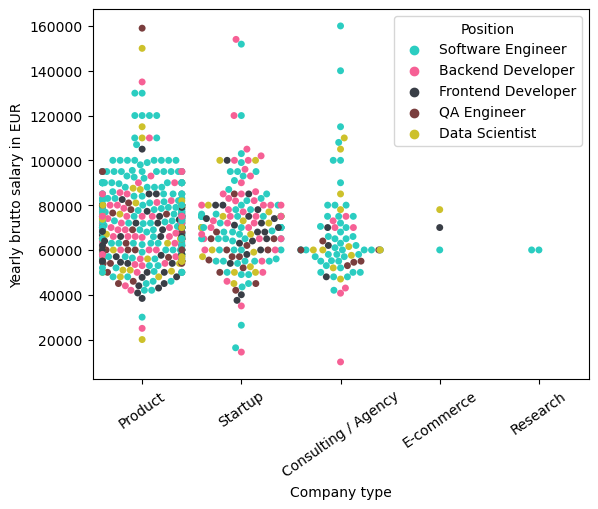

In [66]:
ctype2=df_g_top5p.loc[(df_g_top5p['Company type']=='Product')|(df_g_top5p['Company type']=='Startup')|(df_g_top5p['Company type']=='Consulting / Agency')|(df_g_top5p['Company type']=='E-commerce')|(df_g_top5p['Company type']=='Research')]

sns.swarmplot(ctype2,y='Yearly brutto salary in EUR',x='Company type',hue='Position',palette=['#2BCDC1','#F66095','#393E46','#7A3E3E','#CDC12B'])
plt.xticks(rotation=35,fontsize=10)
plt.show()

### It seems that working for Product companies can get a higher salary on average.

## Lost job due to COVID

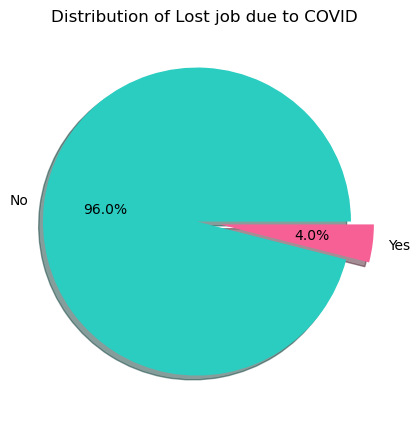

In [67]:
lostjob=df_g_top5p['Lost job due to COVID'].value_counts()[:2]

plt.figure(figsize=(5,5))
plt.pie(lostjob,labels=lostjob.index,autopct='%.1f%%',colors=colors,shadow=True,explode=[0.05,0.1])
plt.title('Distribution of Lost job due to COVID')
plt.show()

### There are 4.0% of people lost their job due to COVID.

In [68]:
comtype_lostjob=df_g_top5p.loc[df_g_top5p['Lost job due to COVID']=='Yes']
comtype_lostjob=comtype_lostjob[['Company type','Company size','Lost job due to COVID']].value_counts()
comtype_lostjob.to_csv('comtype_lostjob.csv')
comtype_lostjob=pd.read_csv('comtype_lostjob.csv')

comtype_lostjob.rename(columns={'0':'count'},inplace=True)
px.bar(comtype_lostjob,x='Company type',y='count',color='Company size',title='Number of Lost job due to COVID',text_auto=True)

### Startup company's laydown rate is much higher than other company types.

## Shorter working hours per week

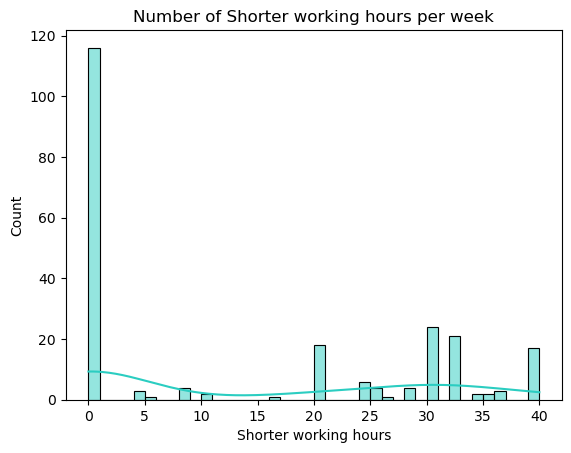

In [69]:
sns.histplot(data=df_g_top5p,x='Shorter working hours',kde=True,color='#2BCDC1',bins=40)
plt.title('Number of Shorter working hours per week')
plt.show()

### Half of the workers didn't be required to work shorter hours, others worked 20-40 hours shorter on average.

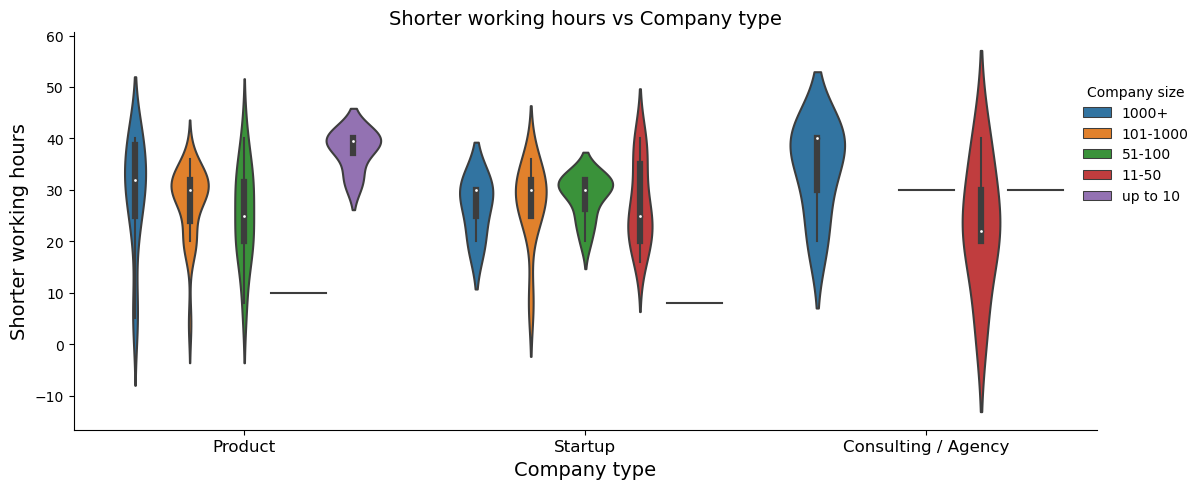

In [70]:
shoter=df_g_top5p.loc[(df_g_top5p['Company type']=='Product')|(df_g_top5p['Company type']=='Consulting / Agency')|(df_g_top5p['Company type']=='Startup')]
shoter=shoter[df_g_top5p['Shorter working hours']>0]
shoter['Company size']=pd.Categorical(shoter['Company size'],categories=['1000+','101-1000','51-100','11-50','up to 10'])

ax=sns.catplot(x='Company type',y='Shorter working hours',data=shoter,kind='violin',hue='Company size',height=5,aspect=2)
plt.ylabel('Shorter working hours',fontsize=14)
plt.xlabel('Company type',fontsize=14)
plt.xticks(fontsize=12)
sns.move_legend(ax,loc='center right',bbox_to_anchor=(1.08,0.7),title='Company size')
plt.title('Shorter working hours vs Company type',fontsize=14)
plt.tight_layout()
plt.show()

### It seems there is a bit wider difference between each company size.

## Work From Home allowance in 2020 

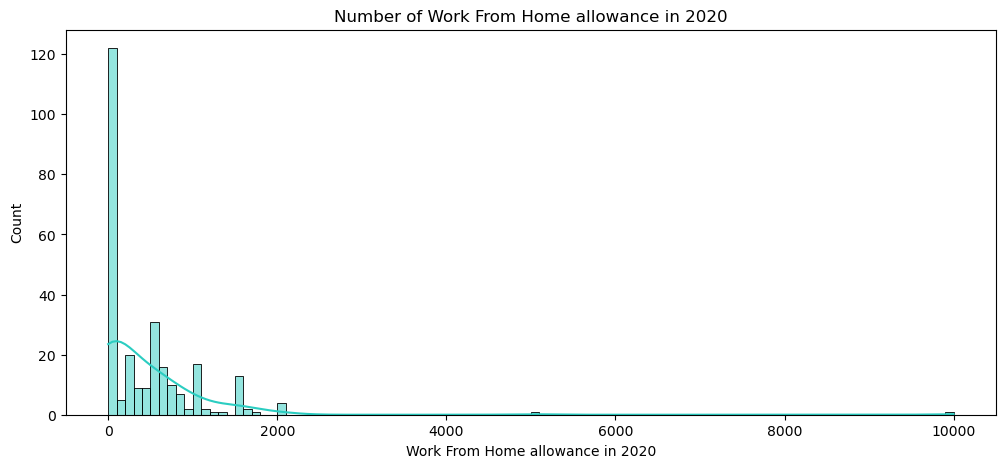

In [72]:
plt.figure(figsize=(12,5))
sns.histplot(data=df_g_top5p,x='Work From Home allowance in 2020',kde=True,color='#2BCDC1',bins=100)
plt.title('Number of Work From Home allowance in 2020')
plt.show()

### Half of the workers didn't get work from home allowance, the others got from 500 to 1500 allowance on average.

In [73]:
# Removing sharp jumps in data
df_g_top5p.loc[(df_g_top5p['Work From Home allowance in 2020']>9000)]
df_g_top5p=df_g_top5p.drop(index=[374],axis=1)

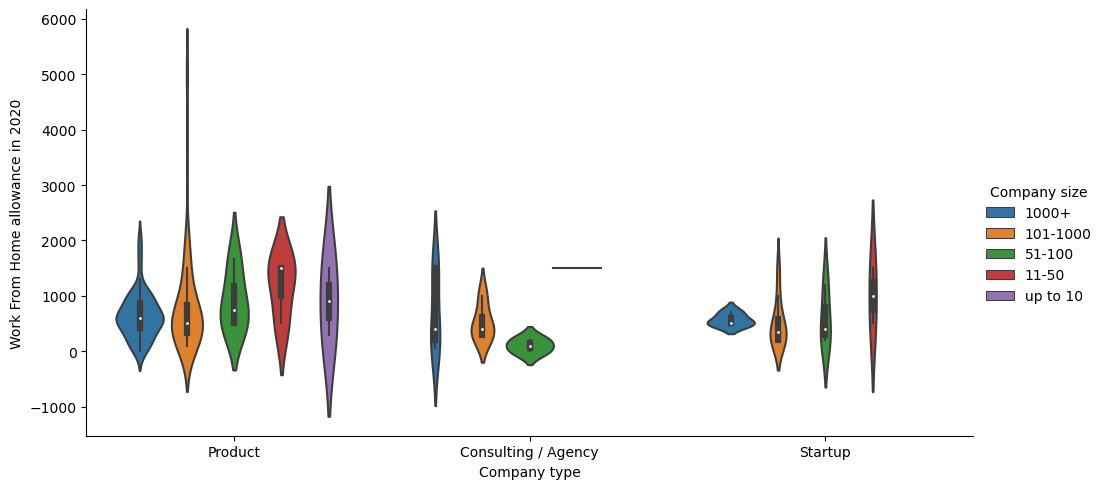

In [74]:
allowance=df_g_top5p.loc[(df_g_top5p['Company type']=='Product')|(df_g_top5p['Company type']=='Consulting / Agency')|(df_g_top5p['Company type']=='Startup')]
allowance=allowance.loc[allowance['Work From Home allowance in 2020']>0]
allowance['Company size']=pd.Categorical(allowance['Company size'],categories=['1000+','101-1000','51-100','11-50','up to 10'])

sns.catplot(allowance,y='Work From Home allowance in 2020',x='Company type',hue='Company size',kind='violin',height=5,aspect=2)
plt.show()

### Work From Home allowance has a bit wider difference between each Company type and Company size.


In [75]:
my_report = sweetviz.analyze([df, "IT"])

                                             |      | [  0%]   00:00 -> (? left)

In [76]:
my_report.show_html("IT.html")

Report IT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
